---
**Step 1: Define the IoT Problem Universe**
---

---

In [204]:
"""

            Connected Assets

                Asset                  Description
                Room                Smart home environment
                Sensors             Temperature, Humidity, Light, CO2
                Appliances        Lights, Fan
                Gateway            Data collection unit

            Connected Operations

                • Sensor monitoring
                • Occupancy detection
                • Appliance automation
                • Energy optimization

            Business Objective

                Reduce unnecessary power consumption while maintaining user comfort.

"""
print()

---

**Step 2 :- Identify Latent Problems**
---


---

In [205]:
def iot_problem(sensor):
    problem=""
    if sensor=="Temperature":
        problem="Fan running unnecessarily"
    elif sensor=="Light":
        problem="Lights ON when room is empty"
    elif sensor=="CO2":
        problem="High CO2 when occupied"
    elif sensor=="Humidity":
        problem="False occupancy detection"
    else:
        problem="No Problem"
    return problem



---
**Step 3 :- Sensor–Problem Mapping**
---

---

In [206]:
for col in df.columns[1:5]:
    print(f"[Sensor] : [{col}]  ==>  [Problem] : [{iot_problem(col)}]")

[Sensor] : [Temperature]  ==>  [Problem] : [Fan running unnecessarily]
[Sensor] : [Humidity]  ==>  [Problem] : [False occupancy detection]
[Sensor] : [Light]  ==>  [Problem] : [Lights ON when room is empty]
[Sensor] : [CO2]  ==>  [Problem] : [High CO2 when occupied]


---

**Step 4 :- Design HDH Matrix**
---


---

In [207]:
hdh_data = [
                        {
                            "observation": "High C02 level",
                            "Sensor": "C02",
                            "Heuristic Rule": "C02 > 900",
                            "Hypothesis": "Room is occupied",
                            "Business Impact": "Turn ON appliances"
                        } ,

                        {
                            "observation": "Low light intensity",
                            "Sensor": "Light",
                            "Heuristic Rule": "Light < 200",
                            "Hypothesis": "Lights needed",
                            "Business Impact": "Switch ON lights"
                        } ,

                        {
                            "observation": "High temperature",
                            "Sensor": "Temperature",
                            "Heuristic Rule": "Temp > 28",
                            "Hypothesis": "Cooling required",
                            "Ousiness Impact": "Turn ON fan"
                        } ,

                        {
                            "observation": "Low CO2 level",
                            "Sensor": "C02",
                            "Heuristic Rule": "C02 < 600",
                            "Hypothesis": "Room empty",
                            "Business Impact": "Turn OFF appliances"
                        }
                    ]

---


**Step 5: Load and Analyze Dataset**
---


---

In [208]:

#importing modules
import numpy as np
import pandas as pd

In [209]:
#Loading IOT Dataset
d1=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/3LAB_28_01_26/datatest.txt")
d2=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/3LAB_28_01_26/datatest2.txt")
d3=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/3LAB_28_01_26/datatraining.txt")


In [210]:
#concating data
df=pd.DataFrame(pd.concat([d1,d2,d3], ignore_index=True))

In [211]:
#first three data rows
df.head(3)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.718,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.730,26.230,572.666667,769.666667,0.004765,1


In [212]:
analyze_df=df.iloc[1:].copy()
analyze_df.drop(columns="HumidityRatio",inplace=True)
analyze_df.drop(columns="date",inplace=True)
analyze_df.head(3)

,Temperature,Humidity,Light,CO2,Occupancy
1,23.7180,26.290,578.400000,760.400000,1
2,23.7300,26.230,572.666667,769.666667,1
3,23.7225,26.125,493.750000,774.750000,1


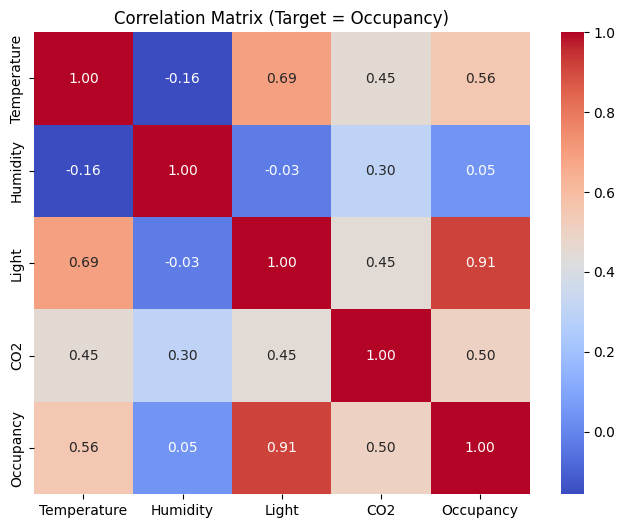

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr =analyze_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Target = Occupancy)")
plt.show()


---
**Step 6: Validate Heuristics using Data**
---


---

In [214]:

high_co2_occupied =analyze_df[(analyze_df["CO2"]>900) &(analyze_df["Occupancy"] == 1)]
print("Samples with High CO2 & Occupied:", len(high_co2_occupied))
print(f"percentage = {float( len(high_co2_occupied))/float(len(analyze_df[analyze_df["Occupancy"] == 1]))*100}")

Samples with High CO2 & Occupied: 2620
percentage = 55.16950937039377


In [215]:

high_co2_noccupied =analyze_df[(analyze_df["CO2"]>900) &(analyze_df["Occupancy"] == 0)]
print("Samples with High CO2 & not Occupied:", len(high_co2_noccupied))
print(f"percentage = {float( len(high_co2_noccupied))/float(len(analyze_df[analyze_df["Occupancy"] == 0]))*100}")

Samples with High CO2 & not Occupied: 1292
percentage = 8.172043010752688


In [216]:
low_co2_noccupied =analyze_df[(analyze_df["CO2"]<900) &(analyze_df["Occupancy"] == 0)]
print("Samples with low CO2 & not occupied:", len(low_co2_noccupied))
print(f"percentage = {float( len(low_co2_noccupied))/float(len(analyze_df[analyze_df["Occupancy"] == 0]))*100}")

Samples with low CO2 & not occupied: 14518
percentage = 91.82795698924731


In [217]:

low_co2_occupied =analyze_df[(analyze_df["CO2"]<900) &(analyze_df["Occupancy"] == 1)]
print("Samples with low CO2 & occupied:", len(low_co2_occupied))
print(f"percentage = {float( len(low_co2_occupied))/float(len(analyze_df[analyze_df["Occupancy"] == 0]))*100}")

Samples with low CO2 & occupied: 2128
percentage = 13.459835547122076


In [218]:
# Counts
counts = {
    "High CO2 & Occupied": len(high_co2_occupied),
    "High CO2 & Not Occupied": len(high_co2_noccupied),
    "Low CO2 & Not Occupied": len(low_co2_noccupied),
    "Low CO2 & Occupied": len(low_co2_occupied)
}

---
**CO₂ Distribution Plot with Occupancy Overlay**
---


---

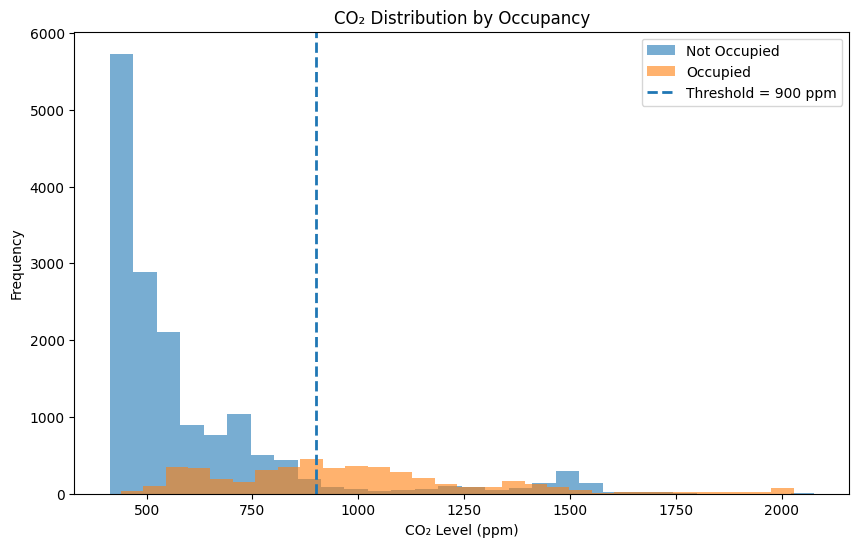

In [219]:
plt.figure(figsize=(10,6))

plt.hist(analyze_df[analyze_df["Occupancy"]==0]["CO2"], bins=30, alpha=0.6, label="Not Occupied")
plt.hist(analyze_df[analyze_df["Occupancy"]==1]["CO2"], bins=30, alpha=0.6, label="Occupied")

plt.axvline(900, linestyle="--", linewidth=2, label="Threshold = 900 ppm")

plt.title("CO₂ Distribution by Occupancy")
plt.xlabel("CO₂ Level (ppm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


---

**Bar Chart of the Four Heuristic Outcomes**
---


---

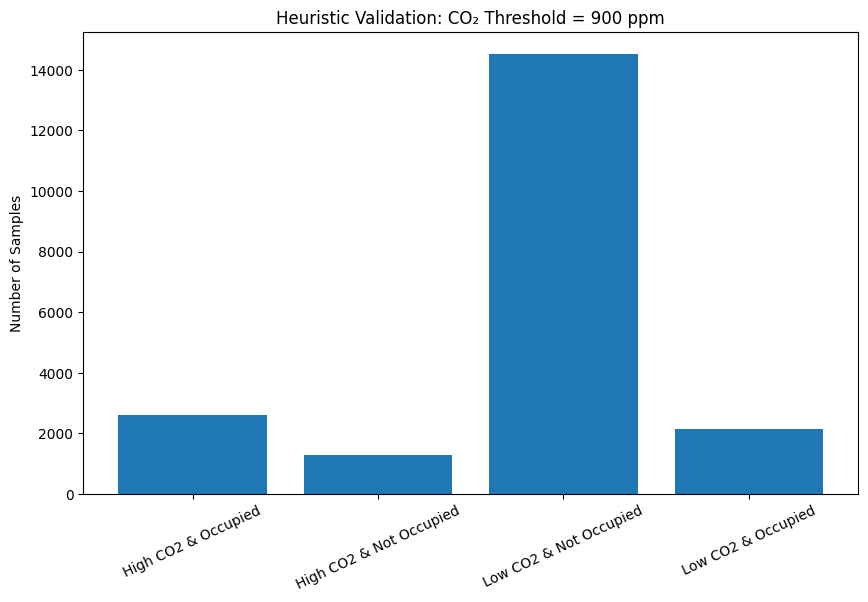

In [220]:
plt.figure(figsize=(10,6))
plt.bar(counts.keys(), counts.values())

plt.title("Heuristic Validation: CO₂ Threshold = 900 ppm")
plt.ylabel("Number of Samples")
plt.xticks(rotation=25)
plt.show()

---
**1D Decision Tree Training**
---

---

occupancy={1 if CO₂>threshold,0 otherwise}
---


---

                    



In [221]:
import numpy as np

co2_values = []
for val in np.sort(analyze_df["CO2"].unique()):
    co2_values.extend([val-0.5, val, val+0.5])

best_thresh = None
best_acc = 0

# Try every possible breakpoint
for t in co2_values:
    preds = (analyze_df["CO2"] > t).astype(int)
    acc = (preds == analyze_df["Occupancy"]).mean()

    if acc > best_acc:
        best_acc = acc
        best_thresh = t

print("Best CO2 Breakpoint =", best_thresh)
print("Best Accuracy =", best_acc)


Best CO2 Breakpoint = 831.5
Best Accuracy = 0.8444476871443164


---
**Accuracy vs CO₂ Threshold Curve (Heuristic Optimization)**
---


---

In [222]:
import numpy as np
import matplotlib.pyplot as plt
len(co2_values)

15498

In [223]:
# Generate thresholds properly
co2_values = np.sort(analyze_df["CO2"].unique())

thresholds = []
for val in co2_values:
    thresholds.extend([val - 0.5, val, val + 0.5])

thresholds = np.array(thresholds)
print(len(thresholds))

15498


In [224]:
# Compute accuracy for each threshold
accuracies = []

for t in thresholds:
    preds = (analyze_df["CO2"] > t).astype(int)
    acc = (preds == analyze_df["Occupancy"]).mean()
    accuracies.append(acc)

accuracies = np.array(accuracies)
print(len(accuracies))


15498


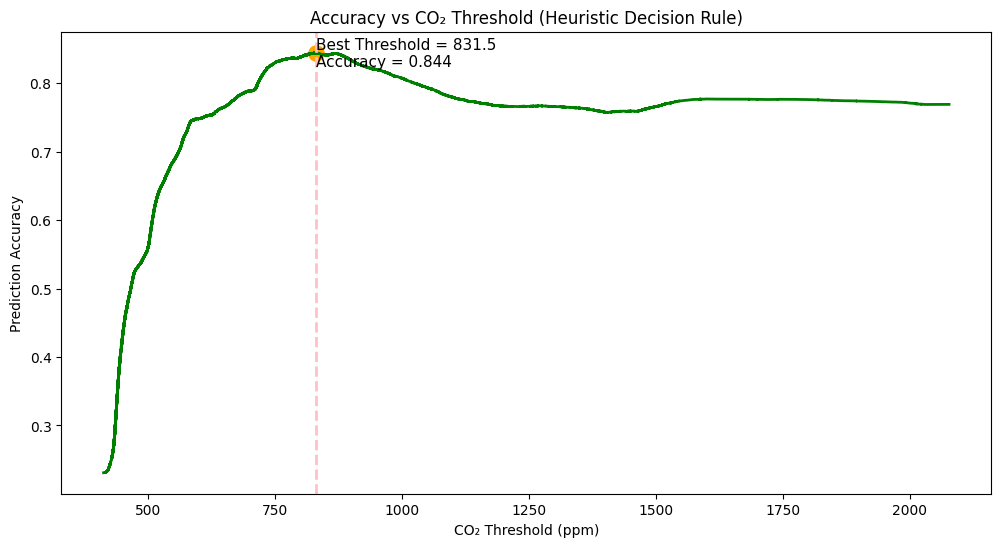

In [225]:
# Plot Accuracy Curve
plt.figure(figsize=(12,6))
plt.plot(thresholds, accuracies, color="green",linewidth=2)

# Highlight best point
plt.scatter(best_thresh, best_acc,color="orange", s=120)
plt.axvline(best_thresh, linestyle="--", color="pink",linewidth=2)

# Labels
plt.title("Accuracy vs CO₂ Threshold (Heuristic Decision Rule)")
plt.xlabel("CO₂ Threshold (ppm)")
plt.ylabel("Prediction Accuracy")

# Annotate best threshold
plt.text(
    best_thresh,
    best_acc - 0.02,
    f"Best Threshold = {best_thresh:.1f}\nAccuracy = {best_acc:.3f}",
    fontsize=11
)

plt.show()

---

**Why This Matters**
---

---

Instead of saying:“We chose 900 ppm because it feels right”
---

We can now say:“We optimized the CO₂ breakpoint and found the best threshold is 831.5 ppm, achieving 84% accuracy.”
---

That’s heuristic → evidence → science.
---


Now we can visualize the charts based on this new threshold
---

---

In [229]:
high_co2_occupied =analyze_df[(analyze_df["CO2"]>831.5) &(analyze_df["Occupancy"] == 1)]
print("Samples with High CO2 & Occupied:", len(high_co2_occupied))
print(f"percentage = {float( len(high_co2_occupied))/float(len(analyze_df[analyze_df["Occupancy"] == 1]))*100}")
high_co2_noccupied =analyze_df[(analyze_df["CO2"]>831.5) &(analyze_df["Occupancy"] == 0)]
print("Samples with High CO2 & not Occupied:", len(high_co2_noccupied))
print(f"percentage = {float( len(high_co2_noccupied))/float(len(analyze_df[analyze_df["Occupancy"] == 0]))*100}")
low_co2_noccupied =analyze_df[(analyze_df["CO2"]<831.5) &(analyze_df["Occupancy"] == 0)]
print("Samples with low CO2 & not occupied:", len(low_co2_noccupied))
print(f"percentage = {float( len(low_co2_noccupied))/float(len(analyze_df[analyze_df["Occupancy"] == 0]))*100}")
low_co2_occupied =analyze_df[(analyze_df["CO2"]<831.5) &(analyze_df["Occupancy"] == 1)]
print("Samples with low CO2 & occupied:", len(low_co2_occupied))
print(f"percentage = {float( len(low_co2_occupied))/float(len(analyze_df[analyze_df["Occupancy"] == 0]))*100}")

Samples with High CO2 & Occupied: 3142
percentage = 66.16129711518214
Samples with High CO2 & not Occupied: 1591
percentage = 10.06325110689437
Samples with low CO2 & not occupied: 14216
percentage = 89.91777356103732
Samples with low CO2 & occupied: 1607
percentage = 10.164452877925363


In [230]:
# Counts
counts = {
    "High CO2 & Occupied": len(high_co2_occupied),
    "High CO2 & Not Occupied": len(high_co2_noccupied),
    "Low CO2 & Not Occupied": len(low_co2_noccupied),
    "Low CO2 & Occupied": len(low_co2_occupied)
}

---
**CO₂ Distribution Plot with Occupancy Overlay**
---


---

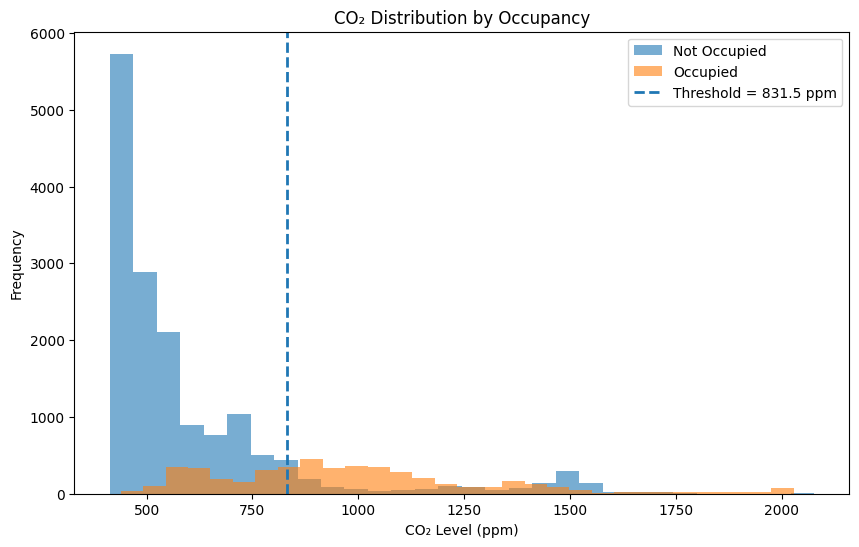

In [231]:
plt.figure(figsize=(10,6))

plt.hist(analyze_df[analyze_df["Occupancy"]==0]["CO2"], bins=30, alpha=0.6, label="Not Occupied")
plt.hist(analyze_df[analyze_df["Occupancy"]==1]["CO2"], bins=30, alpha=0.6, label="Occupied")

plt.axvline(831.5, linestyle="--", linewidth=2, label="Threshold = 831.5 ppm")

plt.title("CO₂ Distribution by Occupancy")
plt.xlabel("CO₂ Level (ppm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


---

**Bar Chart of the Four Heuristic Outcomes**
---


---

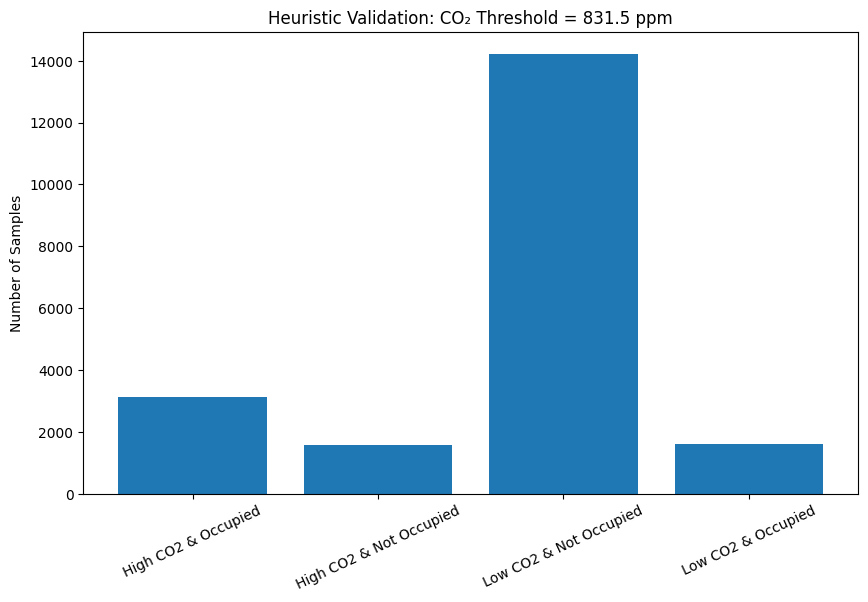

In [232]:
plt.figure(figsize=(10,6))
plt.bar(counts.keys(), counts.values())

plt.title("Heuristic Validation: CO₂ Threshold = 831.5 ppm")
plt.ylabel("Number of Samples")
plt.xticks(rotation=25)
plt.show()

---
**Step 7: Automation Logic Based on HDH**
---


---

In [235]:
def hdh_decision_engine(temp, light, co2):
  decisions = []
  if co2 > 900:
    decisions.append ("Occupancy = YES")
  else:
    decisions. append ("Occupancy = NO")
  if light < 200:
    decisions.append ("Lights = ON")
  else:
    decisions. append ("Lights = OFF")
  if temp > 28:
    decisions.append ("Fan = ON")
  else:
    decisions. append ("Fan = OFF")

  return decisions

---

**Step 8: Test Automation Using Dataset Samples**
---


---

In [236]:
for i in range(5):
  print(_)
  print("\nSensor Values", end=": ")
  print(f"Temp= {analyze_df.iloc[i,0]}, Light= {analyze_df.iloc[i,2]}, CO2= {analyze_df.iloc[i,3]}")

  decisions = hdh_decision_engine(analyze_df.iloc[i,0],analyze_df.iloc[i,2],analyze_df.iloc[i,3])
  print("HDH Decisions:")

  print()
  for d in decisions:
    print(d, end="  ||  ")

15498

Sensor Values: Temp= 23.718, Light= 578.4, CO2= 760.4
HDH Decisions:

Occupancy = NO  ||  Lights = OFF  ||  Fan = OFF  ||  15498

Sensor Values: Temp= 23.73, Light= 572.666666666667, CO2= 769.666666666667
HDH Decisions:

Occupancy = NO  ||  Lights = OFF  ||  Fan = OFF  ||  15498

Sensor Values: Temp= 23.7225, Light= 493.75, CO2= 774.75
HDH Decisions:

Occupancy = NO  ||  Lights = OFF  ||  Fan = OFF  ||  15498

Sensor Values: Temp= 23.754, Light= 488.6, CO2= 779.0
HDH Decisions:

Occupancy = NO  ||  Lights = OFF  ||  Fan = OFF  ||  15498

Sensor Values: Temp= 23.76, Light= 568.666666666667, CO2= 790.0
HDH Decisions:

Occupancy = NO  ||  Lights = OFF  ||  Fan = OFF  ||  

---
**Observations**
---


---
    • CO2 strongly correlates with occupancy

    • Light values help detect artificial lighting usage

    • Temperature impacts cooling requirements
    
    • Heuristics align well with real data patterns
---


---
**Result**
---

---
    Successfully designed and validated an HDH matrix
    for smart home occupancy detection using real IoT sensor data.



---